In [1]:
import numpy as np
from env.cliff_walking import CliffWalking
import itertools
from collections import defaultdict,namedtuple
from matplotlib import pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

Stats=namedtuple("Stats",["episode_length","episode_rewards"])

plt.style.use('ggplot')
class Sarsa(object):
    def __init__(self,num_episodes,num_actions,epsilon,gamma):
        #setting class variables
        self.q=defaultdict(lambda:np.zeros(num_actions))

        self.epsilon=epsilon
        self.gamma=gamma
        self.num_actions=num_actions
        self.num_episodes=num_episodes
        self.env=CliffWalking(self.num_actions)

    def policy(self,state,epsilon):
        A=np.ones(self.num_actions)*epsilon/self.num_actions
        A[np.argmax(self.q[state])]+=1-epsilon
        return A

    def learner(self,alpha=0.5):
        stats=Stats(episode_length=np.zeros(self.num_episodes),
        episode_rewards=np.zeros(self.num_episodes))
        epsilon=self.epsilon
        for episode in range(self.num_episodes):

            state=self.env.reset()
            action_prob=self.policy(state,epsilon/(episode+1))
            action=np.random.choice(np.arange(self.num_actions),p=action_prob)

            for i in itertools.count():

                next_state,reward,done=self.env.step(action)
                next_action_prob=self.policy(next_state,epsilon/(episode+1))
                next_action=np.random.choice(np.arange(self.num_actions),p=next_action_prob)

                #TD error
                td_error=reward+self.gamma*self.q[next_state][next_action]-self.q[state][action]

                # TD update
                self.q[state][action]+=td_error*alpha

                stats.episode_length[episode]=i
                stats.episode_rewards[episode]+=reward

                if done:
                    break
                state=next_state
                action=next_action

        return self.q,stats

    def plot(self,s):
        fig=plt.figure(figsize=(9,5))
        rewards=pd.Series(s.episode_rewards).rolling(10,min_periods=10).mean()
        plt.plot(rewards)
        plt.xlabel('episode count')
        plt.ylabel('reward')
        plt.title('Reward over time')
        plt.show(fig)
        fig=plt.figure(figsize=(9,5))
        plt.plot(np.cumsum(s.episode_length),np.arange(len(s.episode_length)))
        plt.xlabel('episode count')
        plt.ylabel('Episode')
        plt.title('Episode per time step')
        plt.show(fig)




    def q_learner(self,alpha=0.5):
        self.q=defaultdict(lambda:np.zeros(self.num_actions))
        stats=Stats(episode_length=np.zeros(self.num_episodes),
        episode_rewards=np.zeros(self.num_episodes))
        epsilon=self.epsilon
        for episode in range(self.num_episodes):

            state=self.env.reset()
            action_prob=self.policy(state,epsilon/(episode+1))
            action=np.random.choice(np.arange(self.num_actions),p=action_prob)

            for i in itertools.count():
                action_prob=self.policy(state,epsilon/(episode+1))
                action=np.random.choice(np.arange(self.num_actions),p=action_prob)
                next_state,reward,done=self.env.step(action)
                
                #next action chosen is by greedy
                next_action=np.argmax(self.q[next_state])

                #TD error
                td_error=reward+self.gamma*self.q[next_state][next_action]-self.q[state][action]

                # TD update
                self.q[state][action]+=td_error*alpha

                stats.episode_length[episode]=i
                stats.episode_rewards[episode]+=reward

                if done:
                    break

                state=next_state


        return self.q,stats
    



## TD learning

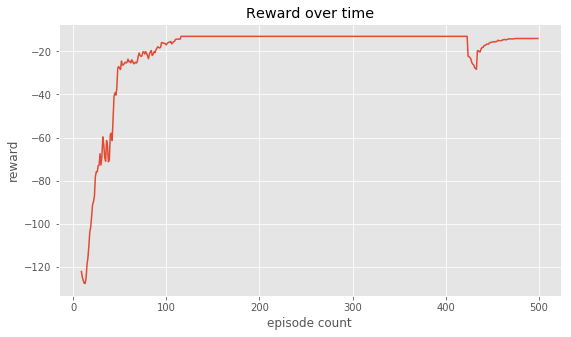

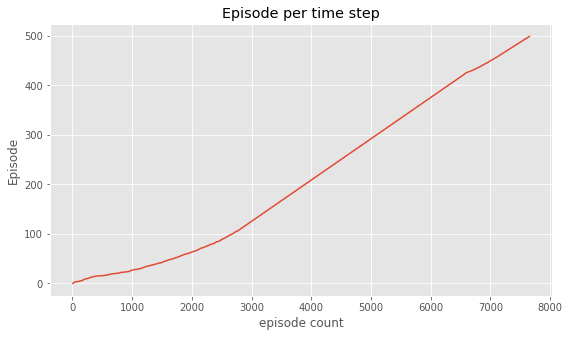

In [2]:
num_episodes=500
num_actions=4
epsilon=0.1
gamma=0.9
sarsa=Sarsa(num_episodes,num_actions,epsilon,gamma)
Q,stats=sarsa.learner()
sarsa.plot(stats)


## Q-learning

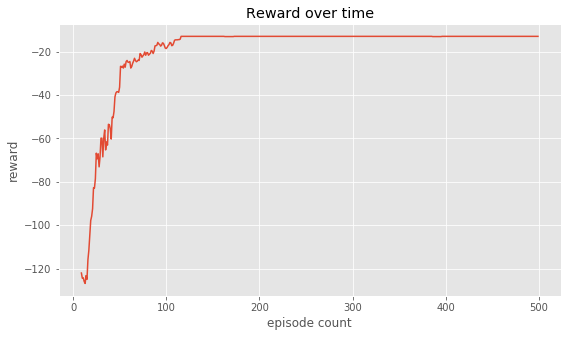

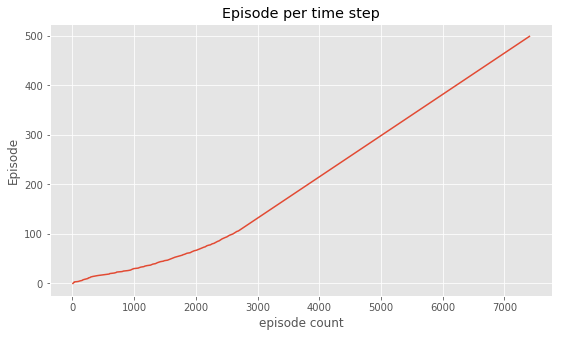

In [3]:
Q,stats=sarsa.q_learner()
sarsa.plot(stats)